In [1]:
import glob
import shutil
import cv2
import os
from PIL import Image
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import * 




In [8]:
name_list = glob.glob("E:/AI-final/Quang not covid/VGG16_covid-main/data/aaaacovi/Covid_not/Normal/images/*")
#Load the training images and labels
X = []
y = []
for name in name_list:
  y.append(0)
  img = cv2.imread(name) 
  img = tf.keras.preprocessing.image.img_to_array(img)
  img = cv2.resize(img,(224,224)) 
  X.append((img))
len(X)

4225

In [9]:
name_list = glob.glob("E:/AI-final/Quang not covid/VGG16_covid-main/data/aaaacovi/archive/COVID-19_Radiography_Dataset/COVID/images/*")



for name in name_list:
  y.append(1)
  img = cv2.imread(name) 
  img = tf.keras.preprocessing.image.img_to_array(img)
  img = cv2.resize(img,(224,224)) 
  X.append((img))
len(X)

7841

In [10]:
X = np.array(X)
print(y)
#y = tf.keras.utils.to_categorical(y, num_classes=1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [13]:
y = np.array(y).reshape(-1,1)

In [14]:
print(len(X))
print(X.shape)
print(y.shape)

7841
(7841, 224, 224, 3)
(7841, 1)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(6272, 224, 224, 3) (1569, 224, 224, 3)
(6272, 1) (1569, 1)


Input Nomarlize

In [16]:

X_train = X_train /255
X_test = X_test / 255

print(X_train.shape)
print(X_test.shape)

(6272, 224, 224, 3)
(1569, 224, 224, 3)


In [23]:

inp = Input(shape = (224,224,3))

cnn = Conv2D(filters = 32,kernel_size = (3),activation ='relu')(inp)

cnn = Conv2D(filters = 64,kernel_size = (3),activation ='relu')(cnn)
pooling = MaxPooling2D(pool_size =(3))(cnn)
drop = Dropout(0.25)(pooling)

cnn = Conv2D(filters = 64, kernel_size =(3),activation ='relu')(drop)
pooling = MaxPooling2D(pool_size =(3))(cnn)
drop = Dropout(0.25)(pooling)

cnn = Conv2D(filters = 128, kernel_size =(3),activation ='relu')(drop)
pooling = MaxPooling2D(pool_size =(3))(cnn)
drop = Dropout(0.25)(pooling)

f =Flatten()(drop)

fc1 = Dense(units = 128, activation ='relu')(f)
out = Dense(units = 1, activation ='sigmoid')(fc1)

model =Model(inputs = inp,outputs =out)
model.summary()


Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 23, 64)       

In [18]:

# model = Sequential()
# model.add(Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=(224,224,3)))
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(MaxPool2D(pool_size=(3,3)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(MaxPool2D(pool_size=(3,3)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(MaxPool2D(pool_size=(3,3)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(128,activation='relu'))
# model.add(Dense(2,activation='softmax'))
# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# model.summary()


In [24]:
optimizer1  = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer = optimizer1,loss = 'binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,batch_size = 16, epochs =10,validation_data =(X_test,y_test))

Epoch 1/10
392/392 [==============================] - 679s 2s/step - loss: 0.5644 - accuracy: 0.7020 - val_loss: 0.4698 - val_accuracy: 0.8113
Epoch 2/10
392/392 [==============================] - 639s 2s/step - loss: 0.3719 - accuracy: 0.8409 - val_loss: 0.3274 - val_accuracy: 0.8738
Epoch 3/10
392/392 [==============================] - 578s 1s/step - loss: 0.3103 - accuracy: 0.8731 - val_loss: 0.3104 - val_accuracy: 0.8846
Epoch 4/10
192/392 [=============>................] - ETA: 4:46 - loss: 0.2677 - accuracy: 0.8883

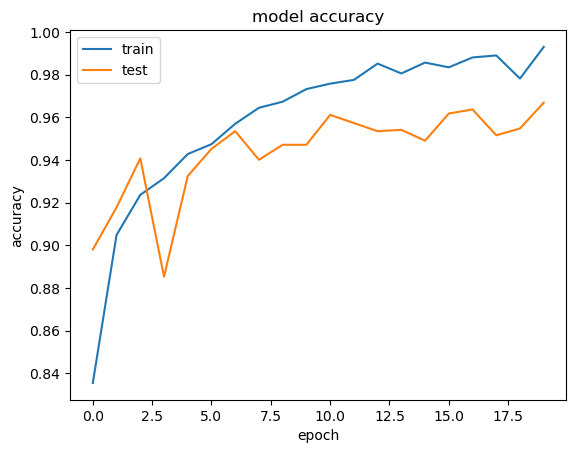

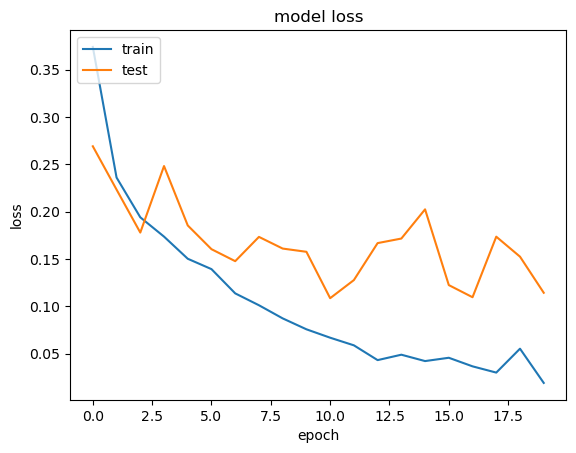

In [12]:
from matplotlib import pyplot  as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc ='upper left')
plt.show()
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc ='upper left')
plt.show()

In [13]:
model.save('model2.h5')

In [15]:
covid = load_model('model2.h5')

(888, 882, 3)


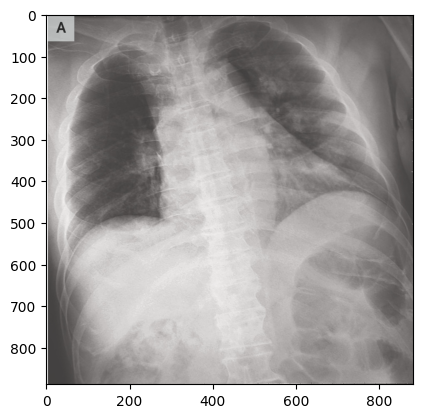

In [ ]:
to_predict = cv2.imread('test_no_covid.jpeg')
imge = cv2.cvtColor(to_predict,cv2.COLOR_BGR2RGB)
resized = cv2.resize(imge,(224,224), interpolation = cv2.INTER_AREA)
pred_img = np.array(resized) / 255.0
pred_img = pred_img.reshape((1,224,224,3))
preds = covid.predict(pred_img,batch_size=1)
pred = np.argmax(preds, axis=1)
if pred == 1:
    result = 'Positive'
else:
    result = 'Negative'
plt.imshow(to_predict,'gray')
plt.title('Result: '+ str(result))
plt.show()